# Situational Analysis: Teachers' Efficacy in Using Digital Resources for STEM Subjects in Kenyan Schools

## Date: 16/05/2025

## Analyst : Simiyu David Masai
---

# Phase 1: BUSINESS UNDERSTANDING

## 1.1 Project Overview

- This project analyzes the efficacy of teachers in Kenyan Junior and Secondary schools in utilizing digital resources for STEM (Science, Technology, Engineering, and Mathematics) education.
- The analysis is based on data collected through Head of Institution interviews, teacher questionnaires, learner Focus Group Discussions (FGDs), and lesson observations.
- The primary goal is to **understand the current landscape, identify challenges, and provide actionable insights for stakeholders like CEMASTEA (Centre for Mathematics, Science and Technology Education in Africa) and the Ministry of Education, Kenya**.

This research aims to address the following:
* **General Objective:**
- To assess the teachers’ efficacy on the use of digital resources for learning STEM subjects in Kenyan schools.
* **Specific Objectives:**
    1.  To investigate the relationship between teacher training (TPD) in STEM and their ability to effectively use digital resources.
    2.  To establish the influence of the use of digital resources on the teacher's instructional practices in STEM subjects.
    3.  To establish teachers’ awareness on the available digital resources for STEM subjects.
    4.  To assess the extent of support provided to teachers for adopting digital resources in teaching STEM subjects.

**Keywords:** STEM Education, Digital Resources, Teacher Efficacy, Kenya, Educational Technology, Teacher Training, Instructional Practices, CEMASTEA, CBC Kenya.

---

## 1.2 KEY STAKEHOLDERS

1. MINISTRY OF EDUCATION
2. CENTRE OF MATHEMATICS SCIENCE AND TECHNOLOGY EDUCATION IN AFRICA
3. SCHOOL ADMINSTRATORS,TEACHERS AND LEARNERS
4. RESEARCH COMMUNITIES



---
## 1.3 DATA SOURCES


In [18]:
from google.colab import drive
drive.mount('/content/drive')

MessageError: Error: credential propagation was unsuccessful

In [ ]:
#  Install dependencies
! pip install rapidfuzz
!pip install spacy
! pip install sentence-transformers umap-learn hdbscan keybert


#import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import plotly.graph_objects as go
import spacy
from collections import Counter
from collections import defaultdict
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.decomposition import LatentDirichletAllocation
import scipy.stats as stats
from nltk.tokenize import word_tokenize
from rapidfuzz import process, fuzz
import nltk
from nltk.corpus import stopwords
import re
nltk.download('punkt_tab')
nltk.download('stopwords')
from nltk.stem import WordNetLemmatizer

nltk.download('wordnet')

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.1/3.1 MB 36.4 MB/s eta 0:00:00


# 2. DATA UNDERSTANDING

## DATA FROM JUNIOR SECONDARY


In [ ]:
#load datasets
#paths to datasets
js1=pd.read_excel('/content/drive/MyDrive/Research on teachers Efficacy on Digital resources/JS Data/FGD-JS.xlsx')
js2=pd.read_excel('/content/drive/MyDrive/Research on teachers Efficacy on Digital resources/JS Data/HoI-JS.xlsx')
js3=pd.read_excel('/content/drive/MyDrive/Research on teachers Efficacy on Digital resources/JS Data/LO - JS .xlsx')
questions=pd.read_excel("/content/drive/MyDrive/Research on teachers Efficacy on Digital resources/JS Data/Teachers' Questionnaire-JS.xlsx")

In [ ]:
#checking dataframes
questions.head()

In [ ]:
questions.tail()

In [ ]:
#checking shape
shape=questions.shape
print(f'Dataframe has {shape[0]} rows and {shape[1]} columns')

In [ ]:
#checking datatypes
questions.dtypes

In [ ]:
#checking the columns
questions.columns

In [ ]:
#CHECKING NULL VALUES
questions.isnull().sum()

### filling null values
- fill this columns with mean ['1. Have you been observed in class (for this research)','6. Teaching experience?','8. How many lessons do you teach per week?','If YES, for how many times?']
- fill with mode ['1. Have you been observed in class (for this research)','7. Highest level of academic qualification:','9. Employer:','10. Have you undergone any teacher professional development training?','Statement [1. I source for digital resources to use during my lesson]','Statement [2. I collaborate with colleagues in sourcing for digital resources]','Statement [3. I develop digital resources for use during the lessons]']
- columns for research ['4.a. Type of school: Category of school	5', '4.b. Type of school: Nature of school']

In [ ]:
mode_value = questions['1. Have you been observed in class (for this  research) '].mode()[0]
questions['1. Have you been observed in class (for this  research) '] = questions['1. Have you been observed in class (for this  research) '].fillna(mode_value)

In [ ]:
#checking
questions['1. Have you been observed in class (for this  research) '].isna().sum()

In [ ]:
#using name of school to fill its geographical location
geog= questions[['2.a. Name of School ', '2.b. County', '2.c. Sub-County']]
geog.head()

In [ ]:
# Show all rows with at least one null value
missing=geog[geog.isnull().any(axis=1)]
#unique schools with missing geographical location
missing['2.a. Name of School '].unique()

In [ ]:
#filling null values in school geographical columns
# Mapping of schools to their correct county and sub-county
schools = ['Sheikh Khalifa jss ', 'Kapsabet Girls ', "St. Patrick's Val", 'Mikindani primary ', 'Munanda ']
counties = ['Mombasa', 'Nandi', 'Homa Bay', 'Mombasa', 'Nakuru']
sub_counties = ['Nyali', 'Nandi Central', 'Rangwe', 'Changamwe', 'Gilgil']

county_map = dict(zip(schools, counties))
subcounty_map = dict(zip(schools, sub_counties))

# Fill missing values for the relevant schools
for school in schools:
    mask = questions['2.a. Name of School '] == school

    # Only fill where values are currently null
    questions.loc[mask & questions['2.b. County'].isnull(), '2.b. County'] = county_map[school]
    questions.loc[mask & questions['2.c. Sub-County'].isnull(), '2.c. Sub-County'] = subcounty_map[school]

In [ ]:
#checking
questions[['2.a. Name of School ', '2.b. County', '2.c. Sub-County']].isna().sum()

- dealth with all null values

In [ ]:
nature=questions[['2.a. Name of School ', '3. Gender',
       '4.a. Type of school: Category of school ',
       '4.b. Type of school: Nature of school ']]
nature.head()

In [ ]:
nature.isna().sum()

In [ ]:
questions['4.b. Type of school: Nature of school '] = questions['4.b. Type of school: Nature of school '].fillna('Regular')
questions['4.a. Type of school: Category of school '] = questions['4.a. Type of school: Category of school '].fillna('Public')
questions['3. Gender'] = questions['3. Gender'].fillna('Male')

In [ ]:
#checking
nature=questions[['2.a. Name of School ', '3. Gender',
       '4.a. Type of school: Category of school ',
       '4.b. Type of school: Nature of school ']]
nature.isna().sum()

- Dealt with all null values

In [ ]:
questions['6. Teaching experience? '] = questions['6. Teaching experience? '].fillna('5 years and below  ')
questions['7. Highest level of academic qualification: '] = questions['7. Highest level of academic qualification: '].fillna('Degree  ')
questions['8. How many lessons do you teach per week? '] = questions['8. How many lessons do you teach per week? '].fillna(28)
questions['9. Employer:'] = questions['9. Employer:'].fillna('TSC')
questions['10. Have you undergone any teacher professional development training? '] = questions['10. Have you undergone any teacher professional development training? '].fillna('Yes')
questions['If YES, for how many times? '] = questions['If YES, for how many times? '].fillna('More than three times')

In [ ]:
questions['If YES, for how many times? '] = questions['If YES, for how many times? '].fillna('More than three times')


In [ ]:
columns = [
    'Statement  [1. I source for digital resources to use during my lesson]',
    'Statement  [2. I collaborate with colleagues in sourcing for digital resources]',
    'Statement  [3. I develop digital resources for use during the lessons]',
    'Statement  [4. I try-out the digital resources before the lessons]',
    'Statement  [5. The school provides adequate digital tools for use in the lessons]',
    'Statement  [6. The school administration supports me to use digital resources for learning]',
    'Statement  [7. The professional development opportunities provided enhance my knowledge and skills in using digital resources]',
    'Statement [8. I give all learners equal opportunities in the use of the digital resources]',
    'Statement [9. I ask learners questions to guide learners’ interaction with the digital resources]',
    'Statement [10. I engage my learners in group discussions to share their ideas with their peers as they interact with the digital resources]',
    'Statement [11. I encourage learners to ask questions on the concepts developed using the digital resources]',
    'Statement [12. I give learners enough time to interact with digital resources]',
    'Statement [13. I give learners assignments on concepts learned using  the digital resources]',
    'Statement [14. I use digital resources   to assess learning]',
    '15. Which digital resources do you commonly use in your lessons? \na) Hardware:',
    '15. Which digital resources do you commonly use in your lessons? \nb)  Software (Apps/videos/animation/simulations/virtual labs/Audio etc.):',
    '16.  How has the use of digital resources influenced my teaching practices?  ',
    '17. What type of support do you receive from the school leadership in the use of digital resources? ',
    '18. (a)  Briefly explain how teacher  professional development has helped you in the use digital resources ',
    '18. (b)  Suggest training needs to be addressed on the use of digital resources in future Teacher Professional Development program '
]

for col in columns:
    if questions[col].dtype in ['float64', 'int64']:
        mean_val = questions[col].mean()
        questions[col] = questions[col].fillna(mean_val)
    elif questions[col].dtype == 'O':  # object (string/categorical)
        mode_val = questions[col].mode()[0]  # mode() returns a Series
        questions[col] = questions[col].fillna(mode_val)
    else:
        # If the dtype is something else, you can add more logic or skip
        pass

# Optional: Check that missing values have been filled
questions[columns].isnull().sum()

- Dealt with all null values

In [ ]:
#saving cleaned dataframe as questionnaire_cleaned
questionnaire_cleaned = questions.copy()
#saving it as an excel file
questionnaire_cleaned.to_excel('questionnaire_cleaned.xlsx', index=False)

## SECOND DATAFRAME

In [ ]:
js1.head()

In [ ]:
js1.tail()

In [ ]:
#checking the shape
shape=js1.shape
print(f'Dataframe has {shape[0]} rows and {shape[1]} columns')

In [ ]:
#checking columns
js1.columns

In [ ]:
#checking null values
js1.isna().sum()

- Only one column has a null value
NEXT STEPS:
- Checking nature of null values

In [ ]:
#column with null value
missing=js1[ '4. Does your teacher allow you to interact with digital resources? (Probe on the mode of interaction with digital resources)  ']

In [ ]:
#unique values in column
missing.unique()

- open-ended question
- drop row with null value

In [ ]:
#drop row with null value in dataframe
js1.dropna(inplace=True)

In [ ]:
#checking
js1.isna().sum()

In [ ]:
#saving cleaned dataframe as questionnaire_cleaned
FGD_JS_cleaned = js1.copy()
#saving it as an excel file
FGD_JS_cleaned.to_excel('FGD_JS_cleaned.xlsx', index=False)


### NEXT DATFRAME

In [ ]:
js2.head()

In [ ]:
js2.tail()

In [ ]:
#checking shape
shape=js2.shape
print(f'Dataframe has {shape[0]} rows and {shape[1]} columns')

In [ ]:
js2['3.b. Type of school:']

In [ ]:
#checking columns
js2.columns


In [ ]:
#checking null values
js2.isna().sum()

In [ ]:
#drop rows with null values
js2.dropna(inplace=True)

In [ ]:
#checking
js2.isna().sum()

In [ ]:
#saving cleaned dataframe
HoI_JS_cleaned = js2.copy()
#saving it as an excel file
HoI_JS_cleaned.to_excel('HoI_JS_cleaned.xlsx', index=False)

## NEXT DATAFRAME

In [ ]:
js3.head()

In [ ]:
js3.tail()

In [ ]:
#shape
shape=js3.shape
print(f'Dataframe has {shape[0]} rows and {shape[1]} columns')

In [ ]:
#columns
js3.columns

In [ ]:
#drop null values in this columns['1.a. School', '1.b. County', '1.c. Sub-County']
js3.dropna(subset=['1.a. School', '1.b. County', '1.c. Sub-County'], inplace=True)

In [ ]:
# #unique values in column
js3['16. Key Inquiry Question (KIQ) '].value_counts()

In [ ]:
#filling columns
js3[ '16. Key Inquiry Question (KIQ) '] = js3[ '16. Key Inquiry Question (KIQ) '].fillna('none')

In [ ]:
#checking null values
js3.isna().sum()

In [ ]:
#shape
shape=js3.shape
print(f'Dataframe has {shape[0]} rows and {shape[1]} columns')

In [ ]:
#dropping null values
js3.dropna(inplace=True)
shape=js3.shape
print(f'Dataframe has {shape[0]} rows and {shape[1]} columns')

In [ ]:
#saving
LO_JS_cleaned = js3.copy()
#saving it as an excel file
LO_JS_cleaned.to_excel('LO_JS_cleaned.xlsx', index=False)

- Through with JSS now onto Senior School Dataframes

# SENIOR SCHOOL DATAFRAME

In [ ]:
# loading datasets
ss1=pd.read_excel('/content/drive/MyDrive/Research on teachers Efficacy on Digital resources/SS Data/FGD-Sec.xlsx')
ss2=pd.read_excel('/content/drive/MyDrive/Research on teachers Efficacy on Digital resources/SS Data/HoI - Sec.xlsx')
ss3=pd.read_excel('/content/drive/MyDrive/Research on teachers Efficacy on Digital resources/SS Data/LO - Sec.xlsx')
ss_questions=pd.read_excel("/content/drive/MyDrive/Research on teachers Efficacy on Digital resources/SS Data/Teacher Questionnaire-Sec Schl.xlsx")

- First Dataframe

In [ ]:
ss1.head()

In [ ]:
ss1.tail()

In [ ]:
#shape
shape=ss1.shape
print(f'Dataframe has {shape[0]} rows and {shape[1]} columns')

In [ ]:
# columns
ss1.columns

In [ ]:
#null values
ss1.isna().sum()

## DATA CLEANING

1. COLUMN CONSISTENCY

In [ ]:
js1=pd.read_excel('FGD_JS_cleaned.xlsx')
js2=pd.read_excel('HoI_JS_cleaned.xlsx')
js3=pd.read_excel('LO_JS_cleaned.xlsx')
questions=pd.read_excel('questionnaire_cleaned.xlsx')

In [ ]:
js1.head()

In [ ]:
js1.columns

In [ ]:
# ensuring column consistency
rename_dict = {
    '1.  Name some of the digital resources your teachers use to teach integrated science, Mathematics, Pre-technical, and Agriculture, Physics, Biology or Chemistry lessons.': 'Digital resources used by teachers',
    '2. Tell me some specific lesson(s) you were taught using digital resources. (Probe  the specific content area in Integrated science, Mathematics, Pre-technical, and Agriculture/ Physics, Biology or Chemistry) ': 'Lessons taught using digital resources',
    '3. How often are digital resources used during your Science or mathematics lessons?(To probe how many lessons, digital resources have been used, in this term-  Science, mathematics, Pre-technical, and Agriculture, Physics, Biology or Chemistry lessons) ': 'Frequency of digital resource use in lessons',
    '4. Does your teacher allow you to interact with digital resources? (Probe on the mode of interaction with digital resources)  ': 'Student interaction with digital resources',
    '5.a. How do you feel when your teacher uses digital resources in the lesson? (Probe for interest, or easy understanding) ': 'Student feelings when teacher uses digital resources',
    '5.b.  Can you share an example of a digital resource that made the lesson exciting, enjoyable, or easier to understand? (Probe for Integrated science, mathematics,  pre-technical, and Agriculture, Physics, Biology or Chemistry)': 'Example of effective digital resource in lesson',
    '6. Does your teacher give you assignments on the main idea learnt when using digital resources in a lesson? (If YES, explain how the assignment help you to recall the learnt idea)': 'Assignments based on digital resource lessons'
}

js1 = js1.rename(columns=rename_dict)

In [ ]:
#checking
js1.columns

In [ ]:
#checking datatypes
js1.dtypes

In [ ]:
js1.head()

- JS2

In [ ]:
js2.head()

In [ ]:
js2.columns

In [ ]:
#renaming columns
rename_dict = {
    '5. For how long have you been a Head of Institution?': 'Tenure as Head of Institution',
    '6.a. Do your STEM teachers participate in professional development  training related to their subjects?': 'STEM teacher participation in professional development',
    '6.b. Probe on how often  this happens and the kind of training': 'Frequency and type of STEM teacher training',
    '7.a. Do you feel the training opportunities adequately equip teachers with the skills to use digital Resources in STEM effectively?': 'Adequacy of training for digital resource use in STEM',
    '7.b. Probe for why or why not': 'Reasoning for adequacy or inadequacy of training',
    '8. What measures do you have in place to ensure teachers are updated with the current digital resources for STEM?  ( Probe about AI, virtual labs among others)': 'Measures to keep teachers updated on digital resources',
    '9.a. Do your STEM teachers incorporate digital resources in their lessons?': 'STEM teacher incorporation of digital resources',
    '9.b. (Probe on frequency and cite instances) (In your opinion, how confident are your teachers in using technology and digital resources in their teaching)': 'Frequency and confidence in technology use by teachers',
    '10. Give examples of digital resources your teachers commonly use in STEM classes? (Probe on both hardware (laptop, projectors) and software (phet))': 'Examples of digital resources used in STEM classes',
    '11.a. Do you evaluate the use of digital resources in the classroom?': 'Evaluation of digital resource use in classroom',
    '11.b. Probe on how': 'Methods of evaluating digital resource use',
    '12. What challenges do your teachers face when integrating digital resources into their STEM lessons?(Probe on any areas that teachers need support)': 'Challenges faced by teachers integrating digital resources',
    '13. How are you addressing the challenges identified above in order to enhance the teacher efficacy? (probe on  technical assistance, maintenance and replacement of digital equipment funding for resources)': 'Measures to address challenges in digital resource integration',
    '14.What is your schools’ policy on use of digital resources in teaching and learning?(Probes on any guidelines/vision on the use of digital resources (phones))': 'School policy on digital resource use'
}

# To rename in your DataFrame, for example if it is called `heads`:
js2 = js2.rename(columns=rename_dict)

In [ ]:
#checking
js2.columns

- THIRD DATAFRAME

In [ ]:
js3.head()

In [ ]:
js3.columns

In [ ]:
#standardizing columns
rename_dict = {
    '6.1. Teaching subjects trained in (College subjects): ': 'Teaching subjects trained (1)',
    '6.2. Teaching subjects trained in (College subjects):  ': 'Teaching subjects trained (2)',
    '7. Employer ': 'Employer',
    '8. Have you attended any teacher training in STEM? ': 'Attended STEM teacher training',
    '9. If yes, how many times have you undergone the training? ': 'Number of STEM trainings attended',
    '10. Grade/Form': 'Grade or Form',
    'JS/SS': 'School Level (JS/SS)',
    '11. Subject ': 'Subject',
    '12. Strand/Topic ': 'Strand or Topic',
    '13. Sub-strand/Sub-Topic ': 'Sub-strand or Sub-Topic',
    '14. Number of Learners: Total ': 'Total learners',
    '15. Lesson Learning outcomes ': 'Lesson learning outcomes',
    'Learning Resources ': 'Learning resources',
    '16. Key Inquiry Question (KIQ) ': 'Key Inquiry Question (KIQ)',
    'Statements  [1. The teacher had a scheme of work]': 'Teacher had scheme of work',
    'Statements  [2. Did the column of resources in the Schemes of work indicate digital resources]': 'Schemes of work indicated digital resources',
    'Statements  [3. The teacher had a lesson plan prepared as per the scheme of work]': 'Lesson plan prepared as per scheme of work',
    'Statements  [4. Did the Lesson plan include digital resources?]': 'Lesson plan included digital resources',
    'Statements  [5. Are the digital resources aligned to the lesson learning outcomes/objectives?]': 'Digital resources aligned to learning outcomes',
    'Learner Engagement  [1. The teacher used digital resources to promote active participation by learners (group task, interactive tools)]': 'Teacher used digital resources for active participation',
    'Learner Engagement  [2. Learners interacted with digital resources effectively to enhance understanding of STEM concepts (e.g., simulations, virtual labs).]': 'Learners interacted with digital resources effectively',
    'Innovative Use of Digital Resource [3. Teacher’s creativity of integrating digital resource in the lesson was evident(e.g., using locally relevant examples, customizing software settings, contextualizing with learners’ experiences)]': 'Teacher creativity in integrating digital resources',
    'Innovative Use of Digital Resource [4. The learners were able to relate the digital resource to their experiences. (e.g., using locally relevant examples, customizing software settings)]': 'Learners related digital resources to experiences',
    'Innovative Use of Digital Resource [5. Digital resources were well-aligned with learning outcomes and learner’s needs (e.g., age-appropriate content, differentiated instruction).]': 'Digital resources aligned with needs and outcomes',
    'Assessment  [6. The teacher provided timely and constructive feedback based on the learners interaction with the digital resource]': 'Teacher provided feedback on digital resource use',
    'Assessment  [7. Learners had the opportunity to give feedback on the concept learnt based on the their interaction with the digital resource]': 'Learners provided feedback on digital resource learning',
    'Classroom Management  [8. Teacher managed transitions in activities involving  digital resources seamlessly]': 'Teacher managed digital resource activities',
    'Classroom Management  [9. Learners remained focused on the task, as the teacher guides or redirects their behavior]': 'Learner focus during digital resource activities',
    'Digital Fluency [10. Teacher demonstrated proficiency in using digital resources to achieve lesson learning outcomes/objectives (e.g., confident navigation of software).]': 'Teacher proficiency with digital resources',
    'Digital Fluency [11. Teacher resolved technical issues effectively during the lesson (e.g., troubleshooting connectivity problems-If none rate 3)]': 'Teacher resolved technical issues with digital resources',
    '1. How prepared was the teacher in terms of accessing and utilizing digital resources? ': 'Teacher preparedness for digital resource use',
    '2. Were there any notable challenges in using digital resources? If yes, describe them. ': 'Challenges in using digital resources',
    '3.  Suggest area(s) in which the teacher should be supported to enhance his/her skills in the use of digital resources in the learning process': 'Suggested support areas for digital resource use'
}

# Suppose your DataFrame is called `observations`:
js3 = js3.rename(columns=rename_dict)

In [ ]:
#checking
js3.columns

- FOURTH DATAFRAME

In [ ]:
questions.columns

In [ ]:
#standardizing column names
rename_dict = {
    '7. Highest level of academic qualification: ': '7. Academic qualification (highest)',
    '8. How many lessons do you teach per week? ': '8. Lessons per week',
    '9. Employer:': '9. Employer',
    '10. Have you undergone any teacher professional development training? ': '10. Attended professional development training',
    'If YES, for how many times? ': 'Teacher training frequency',
    'Statement  [1. I source for digital resources to use during my lesson]': 'Statement 1. Sources digital resources',
    'Statement  [2. I collaborate with colleagues in sourcing for digital resources]': 'Statement 2. Collaborates in sourcing digital resources',
    'Statement  [3. I develop digital resources for use during the lessons]': 'Statement 3. Develops digital resources',
    'Statement  [4. I try-out the digital resources before the lessons]': 'Statement 4. Tries out digital resources before lessons',
    'Statement  [5. The school provides adequate digital tools for use in the lessons]': 'Statement 5. School provides adequate digital tools',
    'Statement  [6. The school administration supports me to use digital resources for learning]': 'Statement 6. School administration supports digital resources',
    'Statement  [7. The professional development opportunities provided enhance my knowledge and skills in using digital resources]': 'Statement 7. Professional development enhances digital resource use',
    'Statement [8. I give all learners equal opportunities in the use of the digital resources]': 'Statement 8. Equal learner opportunities with digital resources',
    'Statement [9. I ask learners questions to guide learners’ interaction with the digital resources]': 'Statement 9. Guides learners’ interaction with questions',
    'Statement [10. I engage my learners in group discussions to share their ideas with their peers as they interact with the digital resources]': 'Statement 10. Group discussions with digital resources',
    'Statement [11. I encourage learners to ask questions on the concepts developed using the digital resources]': 'Statement 11. Encourages learner questions on digital resources',
    'Statement [12. I give learners enough time to interact with digital resources]': 'Statement 12. Time for learner interaction with digital resources',
    'Statement [13. I give learners assignments on concepts learned using  the digital resources]': 'Statement 13. Assignments on digital resources concepts',
    'Statement [14. I use digital resources   to assess learning]': 'Statement 14. Uses digital resources to assess learning',
    '15. Which digital resources do you commonly use in your lessons? \na) Hardware:': '15a. Commonly used digital resources (Hardware)',
    '15. Which digital resources do you commonly use in your lessons? \nb)  Software (Apps/videos/animation/simulations/virtual labs/Audio etc.):': '15b. Commonly used digital resources (Software)',
    '16.  How has the use of digital resources influenced my teaching practices?  ': '16. Influence of digital resources on teaching',
    '17. What type of support do you receive from the school leadership in the use of digital resources? ': '17. School leadership support for digital resource use',
    '18. (a)  Briefly explain how teacher  professional development has helped you in the use digital resources ': '18a. Impact of professional development on digital resource use',
    '18. (b)  Suggest training needs to be addressed on the use of digital resources in future Teacher Professional Development program ': '18b. Suggested future training needs for digital resource use'
}

# Usage example (assuming your DataFrame is called `teachers`)
questions = questions.rename(columns=rename_dict)

In [ ]:
#checking
questions.columns

## DATA WRANGLING
- STANDARDIZING REPSONSES

STEPS:

1. **Standardize Case** - Convert all responses to lowercase to avoid duplication due to case differences.
2. **Remove Extra Spaces and Newlines** - Remove trailing spaces, leading spaces, and newline characters.
3. **Handle Plurals and Common Misspellings** - Normalize plurals and inconsistencies (laptops → laptop, phones → phone, etc.).
4. **Split Composite Entries** - Break apart responses with commas or semicolons into lists (e.g., "laptop, phone" → ["laptop", "phone"]).
5. **Explode to Normalize Analysis** - Convert the list into individual rows for frequency analysis.
6. **Aggregate Cleaned Frequencies** - Now get a cleaner value_counts():


- **CREATING A CLASS TO HANDLE DATA WRANGLING**

1. Features of This Class
- Lowercases and strips whitespace

- Normalizes common plurals and variants

- Splits on common delimiters (, ; /)

- Applies optional mappings (like synonyms)

- Outputs clean, exploded rows and value counts

In [ ]:
questions.columns

In [ ]:

new={'Chemelil Sugar':'BOM',
     'Private':'BOM',
     'Agakhan':'BOM',
     'School management':'BOM',
     'Private School':'BOM',
     'Private':'BOM',
     'others':'BOM',
     'others ':'BOM',
     'employed by thes sch':'BOM',
     'School management ':'BOM',
     'Private ':'BOM',
     'Not indicated	':'TSC',
     'Not indicated':'TSC',
     'not indicated':'TSC',
     'Not specified':'TSC',
     'Not specified ':'TSC',
     ' Not indicated':'TSC',
     'Not Indicated':'TSC',
     'not indicated':'TSC'
     }

questions['9. Employer']=questions['9. Employer'].replace(new)

#

In [ ]:
columns = [
    'Statement 1. Sources digital resources',
    'Statement 2. Collaborates in sourcing digital resources',
    'Statement 3. Develops digital resources',
    'Statement 4. Tries out digital resources before lessons',
    'Statement 5. School provides adequate digital tools',
    'Statement 6. School administration supports digital resources',
    'Statement 7. Professional development enhances digital resource use',
    'Statement 8. Equal learner opportunities with digital resources',
    'Statement 9. Guides learners’ interaction with questions',
    'Statement 10. Group discussions with digital resources',
    'Statement 11. Encourages learner questions on digital resources',
    'Statement 12. Time for learner interaction with digital resources',
    'Statement 13. Assignments on digital resources concepts',
    'Statement 14. Uses digital resources to assess learning'
]

new = {
    1: 'Strongly Disagree',
    2: 'Disagree',
    3: 'Neutral',
    4: 'Agree',
    5: 'Strongly agree'
}

for col in columns:
    questions[col] = questions[col].apply(
        lambda x: new[round(float(x))] if isinstance(x, (int, float, str)) and str(x).replace('.', '', 1).isdigit() and round(float(x)) in new else x
    )
    questions[col] = questions[col].replace(new)

# JUNIOR SECONDARY QUESTIONNAIRE ANALYSIS
- This dataset contains Teacher **Survey Responses**

What It Contains:
- Teacher demographic data: gender, age, experience, qualifications, school type.

- TPD participation: whether trained, how often.

- Digital practices: Likert-scale statements on behavior, planning, collaboration, usage, assessment, and classroom practices.

- Open-ended reflections: personal insights on teaching impact, support, TPD experience, and training needs.

- Digital tools used: hardware & software specified by teachers.

In [ ]:
import matplotlib.pyplot as plt

def plot_likert_statement_pie(column_name, question_text=None, palette=None, df=None):
    if df is None:
        raise ValueError("Please pass a DataFrame using the `df` parameter.")

    if question_text is None:
        question_text = column_name

    if palette is None:
        palette = {
            'Strongly Disagree': 'purple',
            'Disagree': 'red',
            'Neutral': '#fdae61',
            'Agree': '#a6d96a',
            'Strongly Agree': '#d73027'
        }

    categories = ['Strongly Disagree', 'Disagree', 'Neutral', 'Agree', 'Strongly Agree']
    counts = df[column_name].value_counts().reindex(categories, fill_value=0)
    total = counts.sum()
    if total == 0:
        raise ValueError(f"No responses found for column '{column_name}'.")

    percentages = (counts / total * 100).round(1)
    labels = [f"{cat} ({pct:.1f}%)" for cat, pct in zip(categories, percentages)]
    colors = [palette[cat] for cat in categories]

    # Pie chart
    fig, ax = plt.subplots(figsize=(7, 7))
    ax.pie(
        percentages,
        labels=labels,
        colors=colors,
        startangle=140,
        wedgeprops=dict(width=0.4),
        counterclock=False
    )
    ax.set_title(f"{question_text}", fontsize=13)
    plt.tight_layout()
    plt.show()

    # Quick interpretation
    agree = percentages.get('Strongly Agree', 0) + percentages.get('Agree', 0)
    disagree = percentages.get('Disagree', 0) + percentages.get('Strongly Disagree', 0)
    if agree >= 70:
        print("🟢 Interpretation: Majority of teachers show strong agreement.")
    elif disagree >= 30:
        print("🔴 Interpretation: Notable resistance or perceived ineffectiveness.")
    else:
        print("🟡 Interpretation: Mixed or neutral sentiments.")


news = [
    'I source for digital resources to use during my lesson',
    'I collaborate with colleagues in sourcing for digital resources',
    'I develop digital resources for use during the lessons',
    'I try-out the digital resources before the lessons',
    'The school provides adequate digital tools for use in the lessons',
    'The school administration supports me to use digital resources for learning',
    'The professional development opportunities provided enhance my knowledge and skills in using digital resources',
    'I give all learners equal opportunities in the use of the digital resources',
    'I ask learners questions to guide learners’ interaction with the digital resources',
    'I engage my learners in group discussions to share their ideas with their peers as they interact with the digital resources',
    'I encourage learners to ask questions on the concepts developed using the digital resources',
    'I give learners enough time to interact with digital resources',
    'I give learners assignments on concepts learned using the digital resources',
    'I use digital resources to assess learning'
]

columns = [
    'Statement 1. Sources digital resources',
    'Statement 2. Collaborates in sourcing digital resources',
    'Statement 3. Develops digital resources',
    'Statement 4. Tries out digital resources before lessons',
    'Statement 5. School provides adequate digital tools',
    'Statement 6. School administration supports digital resources',
    'Statement 7. Professional development enhances digital resource use',
    'Statement 8. Equal learner opportunities with digital resources',
    'Statement 9. Guides learners’ interaction with questions',
    'Statement 10. Group discussions with digital resources',
    'Statement 11. Encourages learner questions on digital resources',
    'Statement 12. Time for learner interaction with digital resources',
    'Statement 13. Assignments on digital resources concepts',
    'Statement 14. Uses digital resources to assess learning'
]

# Loop through columns and corresponding news/questions
for col, question in zip(columns, news):
    plot_likert_statement_pie(col, question_text=question, df=questions)

- Extract the most common gadgets mentioned in a pandas DataFrame column using NLP:

In [ ]:
# Load spaCy English model
nlp = spacy.load('en_core_web_sm')

# Example: suppose your dataframe is named questions and the column is 'Gadgets Used'
texts = questions['15a. Commonly used digital resources (Hardware)'].dropna().astype(str).tolist()

# Aggregate all texts into one string (or process row by row for more granularity)
all_text = " ".join(texts)

# Process text with spaCy
doc = nlp(all_text)

# Extract nouns (potential gadgets)
nouns = [token.lemma_.lower() for token in doc if token.pos_ == "NOUN"]

# Optional: filter for likely gadget words if you have a known list, or just get most common nouns
common_nouns = Counter(nouns).most_common(20)

print("Most common gadgets mentioned:")
for noun, freq in common_nouns:
    print(f"{noun}: {freq}")

In [ ]:
# Load spaCy English model
nlp = spacy.load('en_core_web_sm')

# Example: suppose your dataframe is named questions and the column is 'Gadgets Used'
texts = questions['15b. Commonly used digital resources (Software)'].dropna().astype(str).tolist()

# Aggregate all texts into one string (or process row by row for more granularity)
all_text = " ".join(texts)

# Process text with spaCy
doc = nlp(all_text)

# Extract nouns (potential gadgets)
nouns = [token.lemma_.lower() for token in doc if token.pos_ == "NOUN"]

# Optional: filter for likely gadget words if you have a known list, or just get most common nouns
common_nouns = Counter(nouns).most_common(20)

print("Most common software mentioned:")
for noun, freq in common_nouns:
    print(f"{noun}: {freq}")

- Step-by-Step Thematic Analysis Using NLP:
1. Text preprocessing (cleaning, stopword removal)

2. Embedding via Sentence Transformers

3. Dimensionality reduction via UMAP

4. Clustering via HDBSCAN

5. Keyword extraction via KeyBERT for labeling themes

## FUNCTION DEFINATION FOR ANALYSIS

In [ ]:
def analyze_open_text_column(df, column_name, n_topics=3, n_words=7, topic_labels=None, sample_column=None):
    """
    Analyze an open-ended survey question using preprocessing, TF-IDF, and LDA topic modeling.

    Args:
        df (pd.DataFrame): The input DataFrame.
        column_name (str): Name of the column containing free-text responses.
        n_topics (int): Number of LDA topics.
        n_words (int): Number of keywords to extract per topic.
        topic_labels (dict): Optional mapping of topic index to human-readable name.
        sample_column (str): Optional column to use for printing sample responses (if different).

    Returns:
        pd.DataFrame: DataFrame with assigned topic and topic name.
    """

    # 1. Preprocess
    def preprocess_text(text):
        text = text.lower()
        text = re.sub(r'\b(?:i{1,3}|iv|v|vi|vii|viii|ix|x)\b', '', text)
        text = re.sub(r'\W', ' ', text)
        text = re.sub(r'\s+', ' ', text)
        tokens = word_tokenize(text)
        stop_words = set(stopwords.words('english'))
        lemmatizer = WordNetLemmatizer()
        tokens = [lemmatizer.lemmatize(word) for word in tokens if word not in stop_words]
        return ' '.join(tokens)

    text_data = df[column_name].dropna()
    text_cleaned = text_data.apply(preprocess_text)

    # 2. TF-IDF
    tfidf_vectorizer = TfidfVectorizer(max_features=1000)
    tfidf_matrix = tfidf_vectorizer.fit_transform(text_cleaned)
    tfidf_scores = np.asarray(tfidf_matrix.mean(axis=0)).flatten()
    top_tfidf_words = [tfidf_vectorizer.get_feature_names_out()[i] for i in np.argsort(tfidf_scores)[-10:]]
    print(f"\n🔹 Top TF-IDF Words: {top_tfidf_words}")

    # 3. LDA
    lda = LatentDirichletAllocation(n_components=n_topics, random_state=42)
    lda.fit(tfidf_matrix)

    def display_topics(model, feature_names):
        topics = {}
        for topic_idx, topic in enumerate(model.components_):
            words = [feature_names[i] for i in topic.argsort()[:-n_words - 1:-1]]
            print(f"🔹 Topic {topic_idx + 1}: {', '.join(words)}")
            topics[topic_idx] = words
        return topics

    topics = display_topics(lda, tfidf_vectorizer.get_feature_names_out())

    # 4. Topic assignment
    topic_assignments = lda.transform(tfidf_matrix).argmax(axis=1)
    result_df = df.copy()
    result_df.loc[text_data.index, 'Assigned Topic'] = topic_assignments
    if topic_labels:
        result_df['Assigned Topic Name'] = result_df['Assigned Topic'].map(topic_labels)

    # 5. Frequency Visualization
    if topic_labels:
        label_counts = result_df['Assigned Topic Name'].value_counts().sort_values()
        labels = label_counts.index.tolist()
    else:
        label_counts = result_df['Assigned Topic'].value_counts().sort_index()
        labels = [f'Topic {i}' for i in label_counts.index]

    plt.figure(figsize=(10, 6))
    bars = plt.barh(labels, label_counts.values, color=plt.cm.Set2.colors[:len(labels)])
    plt.xlabel("Number of Responses")
    plt.title(f"Topic Distribution for: {column_name}")

    for bar in bars:
        plt.text(bar.get_width() + 1, bar.get_y() + bar.get_height()/2,
                 f'{int(bar.get_width())}', va='center')

    plt.tight_layout()
    plt.show()

    # 6. Optional: Sample responses per topic
    print("\n📌 Sample Responses per Topic")
    for topic_id in range(n_topics):
        label = topic_labels.get(topic_id, f"Topic {topic_id}") if topic_labels else f"Topic {topic_id}"
        print(f"\n🟦 {label}")
        samples = result_df[result_df['Assigned Topic'] == topic_id].sample(n=3, random_state=42)
        column_to_sample = sample_column if sample_column else column_name
        for i, text in enumerate(samples[column_to_sample]):
            print(f"  {i+1}. {text}")

    return result_df


### Question 16 : Influence of digital resources on teaching

In [ ]:
text_data = questions['16. Influence of digital resources on teaching'].dropna()  # Drop missing values

### Step 1: Preprocessing Function ###
def preprocess_text(text):
    text = text.lower()  # Lowercasing
    text = re.sub(r'\b(?:i{1,3}|iv|v|vi|vii|viii|ix|x)\b', '', text)
    text = re.sub(r'\W', ' ', text)  # Remove punctuation
    text = re.sub(r'\s+', ' ', text)  # Remove extra spaces
    tokens = word_tokenize(text)  # Tokenization
    stop_words = set(stopwords.words('english'))  # Stopwords
    lemmatizer = WordNetLemmatizer()
    tokens = [lemmatizer.lemmatize(word) for word in tokens if word not in stop_words]
    return ' '.join(tokens)

# Apply preprocessing
text_data_cleaned = text_data.apply(preprocess_text)

# Ensure the index alignment with the original DataFrame
text_data_cleaned.index = text_data.index

### Step 2: TF-IDF Vectorization ###
tfidf_vectorizer = TfidfVectorizer(max_features=1000)  # Limit to top 1000 words
tfidf_matrix = tfidf_vectorizer.fit_transform(text_data_cleaned)

# Convert TF-IDF to DataFrame
tfidf_df = pd.DataFrame(tfidf_matrix.toarray(), columns=tfidf_vectorizer.get_feature_names_out())

# Print top TF-IDF words
top_n = 10  # Number of words to display
tfidf_scores = np.asarray(tfidf_matrix.mean(axis=0)).flatten()
top_tfidf_words = [tfidf_vectorizer.get_feature_names_out()[i] for i in np.argsort(tfidf_scores)[-top_n:]]
print("🔹 Top TF-IDF Words:", top_tfidf_words)

### Step 3: Topic Modeling using LDA ###
lda = LatentDirichletAllocation(n_components=3, random_state=42)  # 3 topics
lda.fit(tfidf_matrix)

# Extract top words for each topic
def display_topics(model, feature_names, num_words=5):
    topics = {}
    for topic_idx, topic in enumerate(model.components_):
        words = [feature_names[i] for i in topic.argsort()[:-num_words - 1:-1]]
        print(f"🔹 Topic {topic_idx + 1}: {', '.join(words)}")
        topics[topic_idx] = words
    return topics

topics = display_topics(lda, tfidf_vectorizer.get_feature_names_out(), num_words=7)



In [ ]:
topic_labels_q18a = {
    0: 'Engagement Through Enjoyable Learning',
    1: 'Interactive and Lively Lessons',
    2: 'Conceptual Understanding and Skill Development'
}

updated_df = analyze_open_text_column(
    questions,
    column_name='16. Influence of digital resources on teaching',
    n_topics=3,
    n_words=7,
    topic_labels=topic_labels_q18a
)


“When we asked teachers how digital resources have influenced their teaching, we identified three key themes:

1. **Engagement & Enjoyment**:

Over a third said that digital tools made learning more fun and captured students’ attention.
Some teachers Cited:
  -  "They make learning easy."
  -  "through digital resources learners are able to access the internet."
  -  ""It has made it easier, more enjoyable and informative."

2. **Interactive Lessons**:

Many described how technology helped them make lessons more hands-on and participatory.Some teachers Cited:
 - "It creates good stimulation and understanding whole teaching"
 - "Facilitate collaboration for the teacher and learner"

3. **Better Understanding**:

Several teachers found that digital resources helped learners grasp difficult concepts more easily and improve their learning outcomes.
 - "It has enhances digital literacy among the learners"
 - "It has improved lessons developments and learning understanding among learners"
 - "not only digital resources helps teacher but it also support learner to develop different skills and also simplifies teacher's work"

### Question 17: School leadership support for digital resource use'

In [ ]:

### Step 1: Load and preprocess text ###
text_data = questions['17. School leadership support for digital resource use'].dropna()

def preprocess_text(text):
    text = text.lower()
    text = re.sub(r'\b(?:i{1,3}|iv|v|vi|vii|viii|ix|x)\b', '', text)
    text = re.sub(r'\W', ' ', text)
    text = re.sub(r'\s+', ' ', text)
    tokens = word_tokenize(text)
    stop_words = set(stopwords.words('english'))
    lemmatizer = WordNetLemmatizer()
    tokens = [lemmatizer.lemmatize(word) for word in tokens if word not in stop_words]
    return ' '.join(tokens)

text_data_cleaned = text_data.apply(preprocess_text)

### Step 2: TF-IDF Vectorization ###
tfidf_vectorizer = TfidfVectorizer(max_features=1000)
tfidf_matrix = tfidf_vectorizer.fit_transform(text_data_cleaned)
tfidf_scores = np.asarray(tfidf_matrix.mean(axis=0)).flatten()
top_tfidf_words = [tfidf_vectorizer.get_feature_names_out()[i] for i in np.argsort(tfidf_scores)[-10:]]
print("🔹 Top TF-IDF Words:", top_tfidf_words)

### Step 3: Topic Modeling with LDA ###
lda = LatentDirichletAllocation(n_components=3, random_state=42)
lda.fit(tfidf_matrix)

def display_topics(model, feature_names, num_words=7):
    topics = {}
    for topic_idx, topic in enumerate(model.components_):
        words = [feature_names[i] for i in topic.argsort()[:-num_words - 1:-1]]
        print(f"🔹 Topic {topic_idx + 1}: {', '.join(words)}")
        topics[topic_idx] = words
    return topics

topics = display_topics(lda, tfidf_vectorizer.get_feature_names_out(), num_words=7)

In [ ]:
topic_names = {
    0: "Provision of Infrastructure (Internet, Wi-Fi, Devices)",
    1: "Basic Digital Tools & Devices (e.g., Tablets, Projectors)",
    2: "Resource Accessibility & Learning Subscriptions"
}
# Assign topic to each response
topic_assignments = lda.transform(tfidf_matrix).argmax(axis=1)
questions['Assigned Topic'] = topic_assignments

# Map topic numbers to names
questions['Assigned Topic Name'] = questions['Assigned Topic'].map(topic_names)

# Count and visualize
topic_counts = questions['Assigned Topic Name'].value_counts().sort_values()

# Bar chart
plt.figure(figsize=(10, 6))
bars = plt.barh(topic_counts.index, topic_counts.values, color=['orange', 'skyblue', 'lightgreen'])
plt.xlabel("Number of Responses")
plt.title("Themes of Support from School Leadership in Use of Digital Resources")

for bar in bars:
    plt.text(bar.get_width() + 1, bar.get_y() + bar.get_height() / 2, f"{int(bar.get_width())}", va='center')

plt.tight_layout()
plt.show()


In [ ]:
# Re-import necessary libraries after code execution state reset
import matplotlib.pyplot as plt

# Sample topic count data (replace with actual values if needed)
topic_counts = {
    "Provision of Infrastructure (Internet, Wi-Fi, Devices)": 203,
    "Basic Digital Tools & Devices (e.g., Tablets, Projectors)": 176,
    "Resource Accessibility & Learning Subscriptions": 87
}

# Labels and sizes for the pie chart
labels = list(topic_counts.keys())
sizes = list(topic_counts.values())
colors = ['#66c2a5', '#fc8d62', '#8da0cb']

# Create pie chart
plt.figure(figsize=(11, 12))
plt.pie(sizes, labels=labels, autopct='%1.1f%%', startangle=140, colors=colors)
plt.axis('equal')  # Equal aspect ratio ensures the pie is drawn as a circle.
plt.title("Support from School Leadership in Use of Digital Resources", fontsize=14)
plt.tight_layout()
plt.show()


Support from School Leadership on Use of Digital Resources

Based on responses from teachers, three key themes emerged:

1. **Provision of Infrastructure (44%)**: Most teachers cited support through provision of internet, Wi-Fi, and computer labs, enabling easier access to digital tools.

2. **Basic Digital Tools (38%)**: Many teachers reported receiving devices like tablets, projectors, and laptops to aid digital instruction.

3. **Resource Accessibility (19%)**: Some noted support in subscribing to digital learning platforms, ensuring they had access to relevant teaching content.

These findings highlight the importance of leadership in enabling both connectivity and content access to empower digital teaching.

### QUESTION **18: (a) Briefly explain how teacher professional development has helped you in the use digital resources	object**



In [ ]:
### Step 1: Load and preprocess text ###
text_data = questions['18a. Impact of professional development on digital resource use'].dropna()

def preprocess_text(text):
    text = text.lower()
    text = re.sub(r'\b(?:i{1,3}|iv|v|vi|vii|viii|ix|x)\b', '', text)
    text = re.sub(r'\W', ' ', text)
    text = re.sub(r'\s+', ' ', text)
    tokens = word_tokenize(text)
    stop_words = set(stopwords.words('english'))
    lemmatizer = WordNetLemmatizer()
    tokens = [lemmatizer.lemmatize(word) for word in tokens if word not in stop_words]
    return ' '.join(tokens)

text_data_cleaned = text_data.apply(preprocess_text)

### Step 2: TF-IDF Vectorization ###
tfidf_vectorizer = TfidfVectorizer(max_features=1000)
tfidf_matrix = tfidf_vectorizer.fit_transform(text_data_cleaned)
tfidf_scores = np.asarray(tfidf_matrix.mean(axis=0)).flatten()
top_tfidf_words = [tfidf_vectorizer.get_feature_names_out()[i] for i in np.argsort(tfidf_scores)[-10:]]
print("🔹 Top TF-IDF Words:", top_tfidf_words)

### Step 3: Topic Modeling with LDA ###
lda = LatentDirichletAllocation(n_components=3, random_state=42)
lda.fit(tfidf_matrix)

def display_topics(model, feature_names, num_words=7):
    topics = {}
    for topic_idx, topic in enumerate(model.components_):
        words = [feature_names[i] for i in topic.argsort()[:-num_words - 1:-1]]
        print(f"🔹 Topic {topic_idx + 1}: {', '.join(words)}")
        topics[topic_idx] = words
    return topics

topics = display_topics(lda, tfidf_vectorizer.get_feature_names_out(), num_words=7)



In [ ]:
### Step 4: Assign Topics and Map Names ###
# You may rename based on output
topic_names = {
    0:  "Practical Classroom Integration",
    1: "Skill & Knowledge Development",
    2: "Improved Content Delivery"
}

topic_assignments = lda.transform(tfidf_matrix).argmax(axis=1)
questions['Assigned Topic'] = topic_assignments
questions['Assigned Topic Name'] = questions['Assigned Topic'].map(topic_names)

### Step 5: Frequency and Visualization ###
topic_counts = questions['Assigned Topic Name'].value_counts().sort_values()

plt.figure(figsize=(10, 6))
bars = plt.barh(topic_counts.index, topic_counts.values, color=['skyblue', 'lightgreen', 'salmon'])
plt.xlabel("Number of Responses")
plt.title("How Teacher Professional Development Helped Use of Digital Resources")

# Add labels on bars
for bar in bars:
    plt.text(bar.get_width() + 2, bar.get_y() + bar.get_height()/2,
             f'{int(bar.get_width())}', va='center')

plt.tight_layout()
plt.show()

### Optional: Print sample responses for each theme ###
for topic_id, name in topic_names.items():
    print(f"\n🟦 Topic {topic_id}: {name}")
    samples = questions[questions['Assigned Topic'] == topic_id].sample(3, random_state=42)
    for i, text in enumerate(samples['16. Influence of digital resources on teaching']):
        print(f"  {i+1}. {text}")

In [ ]:
#visualize pie-chart
topic_counts = {
    "Practical Classroom Integration": 236,
    "Skill & Knowledge Development": 139,
    "Improved Content Delivery": 91
}

# Labels and sizes for the pie chart
labels = list(topic_counts.keys())
sizes = list(topic_counts.values())
colors = ['#66c2a5', '#fc8d62', '#8da0cb']

# Create pie chart
plt.figure(figsize=(8, 10))
plt.pie(sizes, labels=labels, autopct='%1.1f%%', startangle=140, colors=colors)
plt.axis('equal')  # Equal aspect ratio ensures the pie is drawn as a circle.
plt.title("How Teacher Professional Development Helped Use of Digital Resources", fontsize=14)
plt.tight_layout()
plt.show()


From the analysis of over 450 teachers’ open-text responses, we grouped their experiences into three major themes:

1. **Practical Integration in the Classroom** (51%):

Majority of the teachers mentioned how they now incorporate digital devices and online platforms directly in their teaching. Citing benefits e.g. :
 - Arouse the curiosity of the learners and makes lessons interesting
 - It has made it easier to explain concept
 - It has made my teaching appear so real and exciting to my leaners.
Retention of learnt concepts is also enhanced.
 - The learners enjoy learning sessions and the knowledge learnt is retrained
 - It makes it lovely, interesting and enjoyable for learners to easily comprehend

2. **Skill & Knowledge Development**:

30% of the Junior Secondary School teachers indicated training helped them gain the skills and confidence to use digital tools effectively.

3. **Improved Lesson Planning and Content Delivery** :

While **20%** of the teachers explained that training helped them better prepare lessons using digital resources.
Citing:
 - not only digital resources helps teacher but it also support learner to develop different skills and also simplifies teacher's work
 - It enhances critical thinking which is seen in real life teaching

This breakdown highlights that professional development is not just about using devices—it’s about how that knowledge translates into improved teaching and learning.

### **18(b) Suggest training needs to be addressed on the use of digital resources in future Teacher Professional Development program**

In [ ]:
### Step 1: Load and preprocess text ###
text_data = questions['18b. Suggested future training needs for digital resource use'].dropna()

def preprocess_text(text):
    text = text.lower()
    text = re.sub(r'\b(?:i{1,3}|iv|v|vi|vii|viii|ix|x)\b', '', text)
    text = re.sub(r'\W', ' ', text)
    text = re.sub(r'\s+', ' ', text)
    tokens = word_tokenize(text)
    stop_words = set(stopwords.words('english'))
    lemmatizer = WordNetLemmatizer()
    tokens = [lemmatizer.lemmatize(word) for word in tokens if word not in stop_words]
    return ' '.join(tokens)

text_data_cleaned = text_data.apply(preprocess_text)

### Step 2: TF-IDF Vectorization ###
tfidf_vectorizer = TfidfVectorizer(max_features=1000)
tfidf_matrix = tfidf_vectorizer.fit_transform(text_data_cleaned)
tfidf_scores = np.asarray(tfidf_matrix.mean(axis=0)).flatten()
top_tfidf_words = [tfidf_vectorizer.get_feature_names_out()[i] for i in np.argsort(tfidf_scores)[-10:]]
print("🔹 Top TF-IDF Words:", top_tfidf_words)

### Step 3: Topic Modeling with LDA ###
lda = LatentDirichletAllocation(n_components=3, random_state=42)
lda.fit(tfidf_matrix)

def display_topics(model, feature_names, num_words=7):
    topics = {}
    for topic_idx, topic in enumerate(model.components_):
        words = [feature_names[i] for i in topic.argsort()[:-num_words - 1:-1]]
        print(f"🔹 Topic {topic_idx + 1}: {', '.join(words)}")
        topics[topic_idx] = words
    return topics

topics = display_topics(lda, tfidf_vectorizer.get_feature_names_out(), num_words=7)



In [ ]:

### Step 4: Assign Topics and Map Names ###
# You may rename based on output
topic_names = {
    0:  'Digital Pedagogy Skills',
    1: "Demand for relevant, tailored & Inclusive training",
    2: "ICT Literacy & Infrastructure Gaps"
}

topic_assignments = lda.transform(tfidf_matrix).argmax(axis=1)
questions['Assigned Topic'] = topic_assignments
questions['Assigned Topic Name'] = questions['Assigned Topic'].map(topic_names)

### Step 5: Frequency and Visualization ###
topic_counts = questions['Assigned Topic Name'].value_counts().sort_values()

plt.figure(figsize=(10, 6))
bars = plt.barh(topic_counts.index, topic_counts.values, color=['skyblue', 'lightgreen', 'salmon'])
plt.xlabel("Number of Responses")
plt.title("Suggested Training Needs for Future Professional Development")



In [ ]:

import matplotlib.pyplot as plt

# topic distribution (adjust based on your actual LDA assignments)
topic_counts = {
    "Digital Pedagogy Skills": 200,
    "Tailored & Inclusive Training Needs": 171,
    "ICT Literacy & Infrastructure Gaps": 95
}
# Labels and sizes for the pie chart
labels = list(topic_counts.keys())
sizes = list(topic_counts.values())
colors = ['#66c2a5', '#fc8d62', '#8da0cb']

# Create pie chart
plt.figure(figsize=(8, 10))
plt.pie(sizes, labels=labels, autopct='%1.1f%%', startangle=140, colors=colors)
plt.axis('equal')  # Equal aspect ratio ensures the pie is drawn as a circle.
plt.title("Suggested Training Needs for Future Professional Development", fontsize=14)
plt.tight_layout()
plt.show()



In [ ]:
topic_labels_18b = {
    0: 'Digital Pedagogy Skills',
    1: 'Tailored & Inclusive Training Needs',
    2: 'ICT Literacy & Infrastructure Gaps'
}

updated_df = analyze_open_text_column(
    questions,
    column_name='18b. Suggested future training needs for digital resource use',
    n_topics=3,
    n_words=7,
    topic_labels=topic_labels_18b
)

The **Junior Secondary** Teachers Suggested Training Needs for Future Professional Development:

1. **Digital Pedagogy Skills** (43%): Many teachers want to learn how to effectively use digital tools in actual teaching, including how to integrate them into lesson plans and assessments.
- Sample responses:
 - "Using of programming software e.g coding"
 - "organizing for teachers training programs for ICT "

2. **Tailored and Inclusive Training** (37%): Teachers emphasized the need for training that is practical, specific to their subjects, and inclusive of their experience levels.

3. **ICT Literacy and Infrastructure Gaps** (20%): A significant number highlighted the need for foundational digital literacy, such as how to use computers, access online content, or set up basic hardware.


In [ ]:
questions.head()

In [ ]:
#saving
questionaire_1 = questions.copy()
#saving it as an excel file
questionaire_1.to_excel('questionaire_1.xlsx', index=False)

### FGD_JS DATASET
- This dataset is for **Focus Group Discussion-Junior Secondary**
- A qualitative and contextual learner-level dataset capturing firsthand experiences with digital resources in junior secondary STEM classrooms
- It aligns closely with two research objectives and supports both descriptive summary and thematic analysis.

### Metadata / Contextual Columns:
- These describe the school profile:
- Columns:
 - 1.a. Name of School
 - 1.b. County
 - 1.c. Sub-County
 - 2.Level of the school
 - 3.Category
 - 4.Type of school
 - 5.Nature of School

- Purpose: Enables cross-tabulation or thematic comparison across:
 - Counties or regions

 - School categories (e.g., day/boarding, public/private, mixed/single-gender)

 - Urban vs. rural or sub-county level

In [ ]:
df=pd.read_excel('/content/FGD_JS_cleaned.xlsx')


In [ ]:
#renaming columns
df.rename(columns={
    '1.  Name some of the digital resources your teachers use to teach integrated science, Mathematics, Pre-technical, and Agriculture, Physics, Biology or Chemistry lessons.': 'resources_used',
    '2. Tell me some specific lesson(s) you were taught using digital resources. (Probe  the specific content area in Integrated science, Mathematics, Pre-technical, and Agriculture/ Physics, Biology or Chemistry) ': 'lessons_taught_with_digital',
    '3. How often are digital resources used during your Science or mathematics lessons?(To probe how many lessons, digital resources have been used, in this term-  Science, mathematics, Pre-technical, and Agriculture, Physics, Biology or Chemistry lessons) ': 'digital_use_frequency',
    '4. Does your teacher allow you to interact with digital resources? (Probe on the mode of interaction with digital resources)  ': 'student_interaction_mode',
    '5.a. How do you feel when your teacher uses digital resources in the lesson? (Probe for interest, or easy understanding) ': 'student_feeling_about_digital',
    '5.b.  Can you share an example of a digital resource that made the lesson exciting, enjoyable, or easier to understand? (Probe for Integrated science, mathematics,  pre-technical, and Agriculture, Physics, Biology or Chemistry)': 'example_enjoyable_digital_resource',
    '6. Does your teacher give you assignments on the main idea learnt when using digital resources in a lesson? (If YES, explain how the assignment help you to recall the learnt idea)': 'assignment_recall_help'
}, inplace=True)
#checking
df.columns

### QUESTION 1: **Name some of the digital resources your teachers use to teach integrated science, Mathematics, Pre-technical, and Agriculture, Physics, Biology or Chemistry lessons.**

In [ ]:
# === Step 1: Advanced Cleaner & Splitter ===
def clean_and_split(text):
    text = text.lower()

    # Fix joined words like 'laptopsand desktops' → 'laptops, desktops'
    text = re.sub(r'(\w+)[\s]*and[\s]*(\w+)', r'\1, \2', text)
    text = re.sub(r'(\w+)[\s]*&[\s]*(\w+)', r'\1, \2', text)
    text = re.sub(r'([a-z]+)[\s]*(desktops?|laptops?)', r'\1, \2', text)

    # Remove bullets or numbers like "1. ", "2. "
    text = re.sub(r'^\s*\d+[\.\)]\s*', '', text)
    text = re.sub(r'\d+[\.\)]\s*', '', text)

    # Normalize delimiters
    text = re.sub(r'[\n;/]', ',', text)

    # Clean leading/trailing symbols or whitespace
    items = [re.sub(r'^[^\w]+|[^\w]+$', '', item.strip()) for item in re.split(r'[,\n]', text)]

    # Filter non-empty
    return [item for item in items if item]

# Step 2: Clean the resources_used column
all_resources = df['resources_used'].dropna().apply(clean_and_split)

# Flatten list
flattened = [item for sublist in all_resources for item in sublist]

# === Step 3: Final standardization ===
standardization_map = {
    # General hardware
        'smart phones': 'smartphones',
    '1. smart phones ':'smartphones',
    'smart phone': 'smartphones',
    'mobile phone': 'smartphones',
    'mobile phones': 'smartphones',
    'smartphones': 'smartphones',
    ' 2. tablet': 'tablets',
    'tablet': 'tablets',
    'tablets': 'tablets',
    'ipad': 'tablets',
    'ipads': 'tablets',
    'notebook': 'laptops',
    'note books': 'laptops',
    'laptop': 'laptops',
    'laptops': 'laptops',
    'desktop': 'computers',
    'desktop computers': 'computers',
    'desktops': 'computers',
    'desk top computers': 'computers',
    'computer': 'computers',
    'computers': 'computers',
    '3. projector': 'projectors',
    'projector': 'projectors',
    'projectors': 'projectors',
    'markbook': 'smartbooks',
    'smartbook': 'smartbooks',
    'calculator': 'calculators',
    'calculators': 'calculators',
    'smart board': 'smartboards',
    'smartboard': 'smartboards',
    'smartboards': 'smartboards',
    'mobile phone tablet': 'smartphones,tablets',

    # Tools and accessories
    'calculator': 'calculators',
    'calculators': 'calculators',
    'projector': 'projectors',
    'projectors': 'projectors',
    'smart board': 'smartboards',
    'smartboard': 'smartboards',
    'smartboards': 'smartboards',
    'markbook': 'smartbooks',
    'smartbook': 'smartbooks',
    'smartbooks': 'smartbooks'
}

# Apply mapping
standardized = [standardization_map.get(item, item) for item in flattened]

# Count frequencies
resource_counts = Counter(standardized)

# Create DataFrame
resource_df = pd.DataFrame(resource_counts.items(), columns=['Digital Resource', 'Mentions'])
resource_df = resource_df.sort_values(by='Mentions', ascending=False).reset_index(drop=True)

# Output
print(resource_df)


In [ ]:


# Sample top 4 from your cleaned DataFrame
top_resources = resource_df.head(4).copy()

# Calculate percentages
total_mentions = top_resources['Mentions'].sum()
top_resources['Percentage'] = (top_resources['Mentions'] / total_mentions) * 100

# Plot
plt.figure(figsize=(8, 6))
bars = plt.bar(top_resources['Digital Resource'], top_resources['Percentage'], color='mediumseagreen')

# Add percentage labels
for bar in bars:
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, height + 1, f"{height:.1f}%", ha='center', fontsize=12)

# Style
plt.title("Top 4 Digital Resources Used (as Reported by Learners)", fontsize=14)
plt.ylabel("Percentage of Top 4 Mentions")
plt.ylim(0, max(top_resources['Percentage']) + 10)
plt.grid(axis='y', linestyle='--', alpha=0.7)

plt.tight_layout()
plt.show()


### QUESTION 2 : **Tell me some specific lesson(s) you were taught using digital resources. (Probe  the specific content area in Integrated science, Mathematics, Pre-technical, and Agriculture/ Physics, Biology or Chemistry)**

In [ ]:
df['lessons_taught_with_digital']

In [ ]:
import pandas as pd
import numpy as np
import re
import nltk
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
from nltk.tokenize import word_tokenize
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn.decomposition import LatentDirichletAllocation

### Step 1: Load and preprocess text ###
text_data = df['lessons_taught_with_digital']

def preprocess_text(text):
    text = text.lower()
    text = re.sub(r'\b(?:i{1,3}|iv|v|vi|vii|viii|ix|x)\b', '', text)
    text = re.sub(r'\W', ' ', text)
    text = re.sub(r'\s+', ' ', text)
    tokens = word_tokenize(text)

    stop_words = set(stopwords.words('english'))
    domain_stopwords = {'lesson', 'taught', 'using', 'use', 'used', 'digital', 'resource', 'resources'}
    all_stopwords = stop_words.union(domain_stopwords)

    lemmatizer = WordNetLemmatizer()
    tokens = [lemmatizer.lemmatize(word) for word in tokens if word not in all_stopwords]
    return ' '.join(tokens)

text_data_cleaned = text_data.apply(preprocess_text)

### Step 2: TF-IDF Vectorization with Bigrams ###
tfidf_vectorizer = TfidfVectorizer(max_features=1000, ngram_range=(1, 2))
tfidf_matrix = tfidf_vectorizer.fit_transform(text_data_cleaned)
tfidf_scores = np.asarray(tfidf_matrix.mean(axis=0)).flatten()

# Get top 10 TF-IDF terms
top_tfidf_words = [tfidf_vectorizer.get_feature_names_out()[i] for i in np.argsort(tfidf_scores)[-10:]]
print("🔹 Top TF-IDF Words:", top_tfidf_words)

### Step 3: Topic Modeling with LDA using CountVectorizer ###
count_vectorizer = CountVectorizer(max_df=0.95, min_df=2, stop_words='english', ngram_range=(1, 2))
count_matrix = count_vectorizer.fit_transform(text_data_cleaned)

lda = LatentDirichletAllocation(n_components=5, random_state=42)
lda.fit(count_matrix)

def display_topics(model, feature_names, num_words=7):
    topics = {}
    for topic_idx, topic in enumerate(model.components_):
        words = [feature_names[i] for i in topic.argsort()[:-num_words - 1:-1]]
        print(f"🔹 Topic {topic_idx + 1}: {', '.join(words)}")
        topics[topic_idx] = words
    return topics

topics = display_topics(lda, count_vectorizer.get_feature_names_out(), num_words=7)


In [ ]:
### Step 4: Assign Topics and Map Names ###
# Make sure to use `count_matrix`, not `tfidf_matrix` (LDA was fitted on this)
topic_assignments = lda.transform(count_matrix).argmax(axis=1)

# Assuming 'questions' is a DataFrame holding responses from `text_data`
questions = pd.DataFrame({'Response': text_data, 'Cleaned': text_data_cleaned})
questions['Assigned Topic'] = topic_assignments

# Define topic names (you can update these after reviewing actual topic words)
topic_names = {
    0: "STEM Content in Agriculture and Pre-technical Education",
    1: "Digital Aids in Integrated Science and Math Lessons",
    2: "Environmental Science & Agriculture: Plant and Soil Education",
    3: "Computer-Supported Learning in Pre-technical and Science Subjects",
    4: "Core Integrated Science Concepts Delivered Digitally"
}

questions['Assigned Topic Name'] = questions['Assigned Topic'].map(topic_names)

### Step 5: Frequency and Visualization ###
# Calculate topic percentages
topic_counts = questions['Assigned Topic Name'].value_counts().sort_values()
topic_percentages = (topic_counts / topic_counts.sum() * 100).round(1)

plt.figure(figsize=(10, 6))
bars = plt.barh(topic_percentages.index, topic_percentages.values, color='teal')
plt.xlabel("Percentage of Responses (%)")
plt.title("Suggested Training Needs for Future Professional Development", fontsize=14)
plt.grid(axis='x', linestyle='--', alpha=0.5)

# Add percentages to bars
for bar, pct in zip(bars, topic_percentages.values):
    width = bar.get_width()
    plt.text(width + 0.5, bar.get_y() + bar.get_height()/2,
             f'{pct}%', va='center', fontsize=10)

plt.tight_layout()
plt.show()

INTERPRATION:
1. Majority **29.3%** of students mentioned **Computer-Supported Learning in Pre-technical and Science Subjects** as specific lessons they were taught using digital resources. This theme puts Emphasis on digital tools (computers) used in Pre-Technical Studies and general sciences.
- This was followed by:
2. **STEM Content in Agriculture and Pre-technical Education** with (**24%**) of all student responses, this theme emphasizes digital instruction in Agriculture and Pre-Technical Education as core CBC learning areas.
3. **Integrated Science and Math Lessons** with **20%** of all responses, this theme involved Use of videos to support understanding in core scientific structures and mathematical content.


### QUESTION 3:**How often are digital resources used during your Science or mathematics lessons?(To probe how many lessons, digital resources have been used, in this term-  Science, mathematics, Pre-technical, and Agriculture, Physics, Biology or Chemistry lessons)**

- Extracting Frequency

In [ ]:
col_name='digital_use_frequency'
responses = df[col_name].dropna()

# Helper function for mapping words to numbers
word_to_num = {
    'one': 1, 'once': 1,
    'two': 2, 'twice': 2,
    'three': 3, 'thrice': 3,
    'four': 4,
    'five': 5,
    # add more if needed
}

def extract_numeric(text):
    # Check for word numbers first
    for word, num in word_to_num.items():
        if re.search(rf'\b{word}\b', text):
            return num
    # Then check for digit numbers
    match = re.search(r'\b(\d+)\b', text)
    if match:
        return int(match.group(1))
    return None

def categorize_frequency(text):
    text = str(text).strip().lower()

    # Handle split/compound answers (e.g., "maths-once, science-several, agriculture-thrice")
    if ',' in text or ';' in text:
        # Split on commas or semicolons, categorize each, and pick the most frequent category
        parts = re.split(r'[;,]', text)
        categories = [categorize_frequency(part) for part in parts]
        # Return the most frequent non 'Unclear/Other'
        from collections import Counter
        cat_counts = Counter(categories)
        for cat, _ in cat_counts.most_common():
            if cat != 'Unclear/Other':
                return cat
        return 'Unclear/Other'

    # Specific patterns
    if 'every day' in text or 'daily' in text:
        return 'Daily'
    if 'Everyday' in text or 'daily' in text:
        return 'Daily'
    if 'weekly' in text:
        return 'Weekly'
    if 'rarely' in text or 'not often' in text:
        return 'Rarely'
    if 'regularly' in text:
        return 'Regularly (unspecified)'
    if 'term' in text or 'month' in text or 'monthly' in text:
        return 'Termly/Monthly'
    if 'several' in text or 'few' in text:
        return 'A few times'

    # General numeric patterns
    num = extract_numeric(text)
    if num is not None:
        # Check for 'per week' or 'a week'
        if 'week' in text:
            if num >= 5:
                return 'Daily'
            elif num >= 3:
                return '3-4 times/week'
            elif num == 2:
                return 'Twice a week'
            elif num == 1:
                return 'Once a week'
        # If no time period specified, but number present
        else:
            # Guessing: 1 = Once a week, 2 = Twice a week, 3-4 = 3-4 times/week, 5+ = Daily
            if num >= 5:
                return 'Daily'
            elif num >= 3:
                return '3-4 times/week'
            elif num == 2:
                return 'Twice a week'
            elif num == 1:
                return 'Once a week'
    # Phrases like "sometimes" or "occasionally"
    if 'sometimes' in text or 'occasionally' in text:
        return 'Occasionally'

    return 'Unclear/Other'

# Apply categorization
df['Usage Frequency Category'] = df[col_name].apply(categorize_frequency)

# Frequency and percentage calculation
freq_counts = df['Usage Frequency Category'].value_counts().sort_values(ascending=True)
total = freq_counts.sum()
freq_percentages = (freq_counts / total * 100).round(1)

# Print analysis table
summary = pd.DataFrame({'Count': freq_counts, 'Percentage': freq_percentages})
print("Frequency of Digital Resource Use (N = {}):".format(total))
print(summary)

# Plot results with both count and percentage
plt.figure(figsize=(10, 6))
bars = plt.barh(summary.index, summary['Count'], color='teal')
plt.xlabel('Number of Responses')
plt.title('Frequency of Digital Resource Use in Science/Math Lessons')
plt.tight_layout()

# Add count and percentage to bars
for bar, count, pct in zip(bars, summary['Count'], summary['Percentage']):
    width = bar.get_width()
    plt.text(width + 1, bar.get_y() + bar.get_height()/2,
             f'{int(count)} ({pct}%)', va='center', fontsize=10)

plt.show()

INTERPRETATION:
- Majority (**23%**) of the students indicated that they **RARELY** used Digital resources during your Science or mathematics lessons
- While **14%** indicated they Used this digital resources **Termly/Monthly**
- And **12%** indicated they used digital resources for maths and Science lessons **Twice a week**

### QUESTION 4: **Does your teacher allow you to interact with digital resources? (Probe on the mode of interaction with digital resources)**

- Extract Frequency

In [ ]:

col_name = 'student_interaction_mode'
responses = df[col_name].dropna()

def categorize_interaction(text):
    text = str(text).strip().lower()
    # Direct "No" responses
    if re.fullmatch(r'no+', text) or text.startswith("no."):
        return "No"
    # Passive/Observed interaction (students do not handle devices)
    if "rarely" in text or "shown the outcome" in text or "watch" in text or "demonstrate" in text:
        return "Rarely/Passive Observation"
    # Active group work
    if "group" in text or "groups" in text:
        return "Yes - Group Interaction"
    # Allowed/search/use digital resources, explicit
    if "given" in text or "allowed" in text or "can search" in text or "were allowed" in text:
        return "Yes - Active Individual Use"
    if "search" in text or "google" in text or "youtube" in text or "use" in text or "using" in text or "operate" in text or "operating" in text:
        return "Yes - Active Individual Use"
    # Sometimes/occasionally
    if "sometimes" in text or "occasionally" in text:
        return "Yes - Active Individual Use"
    # Generic yes
    if text.startswith("yes"):
        return "Yes - Active Individual Use"
    # Fallback
    return "Other/Unclear"

df['Interaction Category'] = df[col_name].apply(categorize_interaction)

# Frequency and percentage calculation
freq_counts = df['Interaction Category'].value_counts().sort_values(ascending=True)
total = freq_counts.sum()
freq_percentages = (freq_counts / total * 100).round(1)

# Print analysis table
summary = pd.DataFrame({'Count': freq_counts, 'Percentage': freq_percentages})
print(f"Student Interaction Mode Analysis (N = {total}):")
print(summary)

# Plot results with percentages
plt.figure(figsize=(10, 6))
bars = plt.barh(summary.index, summary['Count'], color='skyblue')
plt.xlabel('Number of Responses')
plt.title('Student Interaction with Digital Resources')
plt.tight_layout()

# Add count and percentage to bars
for bar, count, pct in zip(bars, summary['Count'], summary['Percentage']):
    width = bar.get_width()
    plt.text(width + 0.5, bar.get_y() + bar.get_height()/2,
             f'{int(count)} ({pct}%)', va='center', fontsize=10)

plt.show()

- A large majority of students (71 out of 99, or 71.7%) reported "Yes - Active Individual Use". This means that most students are not just passive observers—they are actively and individually using digital resources in their lessons.
- Group interactions account for 9 students (9.1%), indicating that some teachers encourage collaborative digital activities.
- Other/Unclear responses make up 8 students (8.1%), suggesting a small portion of responses were ambiguous or didn’t fit standard categories.
- No interaction was reported by 6 students (6.1%), showing that a minority of students are not allowed to interact with digital resources in any form.
- Rarely/Passive Observation was reported by 5 students (5.1%), meaning a few students only watch or observe rather than interact directly.

QUESTION 5 : **How do you feel when your teacher uses digital resources in the lesson? (Probe for interest, or easy understanding)**

- Extracting student reactions using NLP

In [ ]:
# define a function to analyze
from textblob import TextBlob

def analyze_student_feelings(df, text_column):
    # ========== 1. Setup ==========
    stop_words = set(stopwords.words('english'))
    lemmatizer = WordNetLemmatizer()

    # ========== 2. Clean text ==========
    def clean_text(text):
        text = str(text).lower()
        text = re.sub(r'[^\w\s]', '', text)
        tokens = word_tokenize(text)
        tokens = [lemmatizer.lemmatize(word) for word in tokens if word not in stop_words]
        return ' '.join(tokens)

    df['cleaned_text'] = df[text_column].apply(clean_text)

    # ========== 3. Assign Themes ==========
    themes = {
        'happy': ['happy', 'joy', 'glad', 'pleased', 'delight', 'excited', 'great', 'love', 'enjoy'],
        'interested': ['interesting', 'interest', 'curious', 'engaged', 'motivated', 'lively'],
        'understanding': ['understand', 'clear', 'easy', 'comprehend', 'know', 'learn', 'better'],
        'confused': ['confused', 'lost', 'hard', 'difficult', 'bored', 'frustrated']
    }

    def assign_themes(text):
        assigned = []
        for theme, keywords in themes.items():
            if any(k in text for k in keywords):
                assigned.append(theme)
        return assigned if assigned else ['no_theme']

    df['themes'] = df['cleaned_text'].apply(assign_themes)

    # ========== 4. Sentiment Analysis ==========
    def get_sentiment(text):
        analysis = TextBlob(text)
        polarity = analysis.sentiment.polarity
        if polarity > 0.1:
            return 'positive'
        elif polarity < -0.1:
            return 'negative'
        else:
            return 'neutral'

    df['sentiment'] = df['cleaned_text'].apply(get_sentiment)

    # ========== 5. Summarize ==========
    all_themes = [theme for sublist in df['themes'] for theme in sublist]
    theme_counts = Counter(all_themes)
    sentiment_counts = df['sentiment'].value_counts()

    print("\n--- Theme Frequencies ---")
    for theme, count in theme_counts.items():
        print(f"{theme}: {count}")

    print("\n--- Sentiment Distribution ---")
    print(sentiment_counts)

    # ========== 6. Visualize ==========
    # Theme bar plot
    plt.figure(figsize=(8, 4))
    plt.bar(theme_counts.keys(), theme_counts.values(), color='skyblue')
    plt.title("Theme Frequencies")
    plt.xlabel("Themes")
    plt.ylabel("Count")
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.show()

    # Sentiment pie chart
    plt.figure(figsize=(6, 6))
    sentiment_counts.plot.pie(autopct='%1.1f%%', colors=['green', 'red', 'grey'])
    plt.title("Sentiment Distribution")
    plt.ylabel("")
    plt.show()





In [ ]:
#  usage
# Assuming df is your DataFrame
results = analyze_student_feelings(df, 'student_feeling_about_digital')

# View processed outputs
results.head()


**Key Insights:**

1. **"understanding" (73 mentions)**
- This is the dominant theme, mentioned in 73 out of 99 responses.
- Interpretation: Most students feel that digital resources help them understand lessons better, indicating a clear cognitive benefit.

2. **"happy" and "interested" (both 47 mentions)**
- These reflect strong emotional engagement and positive affective responses to digital learning.
- Interpretation: Many students feel emotionally positive and engaged, showing that digital tools may enhance not just learning, but also the classroom experience.

**Key Insights - Sentiment Analysis**:
1. **94%** of responses are positive — This shows a strong overall satisfaction with the use of digital resources.

2. No negative sentiments detected — Even if a few concerns exist (like the 1 "confused" theme), they don't significantly affect the emotional tone.

3. Neutral sentiments (6 responses) may reflect brief or factual responses without emotional weight (e.g., “It helps us learn”).

QUESTION 5b : **Can you share an example of a digital resource that made the lesson exciting, enjoyable, or easier to understand? (Probe for Integrated science, mathematics,  pre-technical, and Agriculture, Physics, Biology or Chemistry)**

- moving from affective evaluation to experiential evidence and concrete examples

**Objective**
- To identify specific digital resources or tools students found exciting, enjoyable, or helpful for understanding lessons — especially within specific subjects:
Integrated Science, Mathematics, Pre-Technical Skills, Agriculture, Physics, Biology, Chemistry.

In [ ]:
def analyze_digital_resource_examples(df, text_column):
    import pandas as pd
    import re
    from collections import Counter
    import matplotlib.pyplot as plt
    from wordcloud import WordCloud

    # Define known digital tools and subjects
    digital_tools = [
        'tablets', 'projector','projectors', 'laptops', 'computer','computers', 'smartphone','smartphones', 'ipad', 'video', 'audio',
        'simulation', 'animation', 'internet', 'google', 'photos', 'apps', 'presentation',
        'powerpoint', 'pdf', 'digital board', 'quiz', 'game', 'phone'
    ]

    subject_areas = [
        'integrated science', 'mathematics', 'math', 'pre-technical', 'pre technical',
        'agriculture', 'physics', 'biology', 'chemistry'
    ]

    def extract_resources(text):
        text = str(text).lower()
        tools = [tool for tool in digital_tools if tool in text]
        subjects = [subject for subject in subject_areas if subject in text]
        return tools, subjects

    df['digital_tools'], df['subjects'] = zip(*df[text_column].apply(extract_resources))

    # Count frequency
    all_tools = [tool for sublist in df['digital_tools'] for tool in sublist]
    all_subjects = [subject for sublist in df['subjects'] for subject in sublist]
    tool_counts = Counter(all_tools)
    subject_counts = Counter(all_subjects)

    # Print summaries
    print("\n--- Most Frequently Mentioned Digital Tools ---")
    for tool, count in tool_counts.items():
        print(f"{tool}: {count}")

    print("\n--- Subject Areas Where Tools Were Applied ---")
    for subject, count in subject_counts.items():
        print(f"{subject}: {count}")


analyze_digital_resource_examples(df, 'example_enjoyable_digital_resource')



**ADDITIONAL STEPS TO ANSWER**

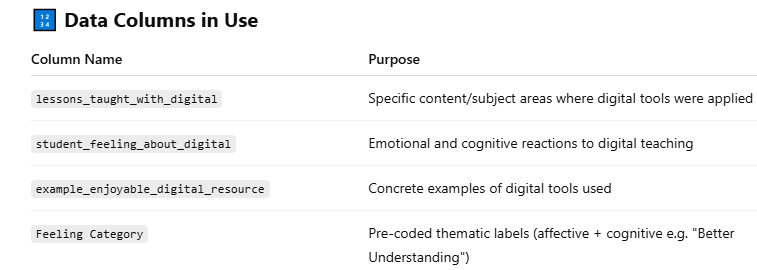

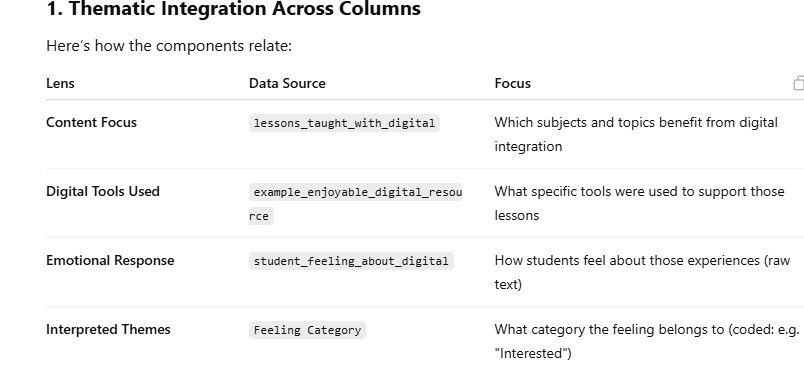

In [ ]:
# step 1 Quantitative Summary by Theme and Tool
# Start with grouped summaries such as:
df['Feeling Category'].value_counts()


In [ ]:
# step 2 :  Top Tools by Category
# Link tools to feeling categories:

tool_by_feeling = defaultdict(list)

for _, row in df.iterrows():
    tools = str(row['example_enjoyable_digital_resource']).lower()
    category = row['Feeling Category']
    if pd.notna(tools) and pd.notna(category):
        for tool in ['laptop', 'tablet', 'projector', 'smartphone', 'computer']:
            if tool in tools:
                tool_by_feeling[category].append(tool)

#summary
{cat: Counter(tools) for cat, tools in tool_by_feeling.items()}


In [ ]:
# Step 3: 3. Subject-Level Insights
# Parse lessons_taught_with_digital for subject patterns:
subject_keywords = {
    'Integrated Science': ['integrated science', 'living things', 'plants'],
    'Mathematics': ['mathematics', 'math'],
    'Agriculture': ['agriculture', 'farming'],
    'Biology': ['biology'],
    'Chemistry': ['chemistry', 'atom', 'molecules'],
    'Physics': ['physics'],
    'Pre-Technical': ['pre-technical', 'scratch', 'materials']
}

def match_subject(text):
    matches = []
    text = str(text).lower()
    for subject, keywords in subject_keywords.items():
        if any(kw in text for kw in keywords):
            matches.append(subject)
    return matches if matches else ['Unknown']

df['Subjects'] = df['lessons_taught_with_digital'].apply(match_subject)
#  count frequency
from itertools import chain
pd.Series(list(chain.from_iterable(df['Subjects']))).value_counts()


In [ ]:
# step 4 :4. Cross-Tab Summary: Subjects × Tools × Feelings
# Build a 3-way pivot or grouped summary:
summary = df.explode('Subjects').groupby(['Subjects', 'Feeling Category'])['example_enjoyable_digital_resource'].count().unstack(fill_value=0)
summary

- Above cross-tab **shows which subjects had the most positive emotional and learning outcomes, supported by which tools.**

- The responses overwhelmingly show that **digital resources such as tablets, laptops, projectors, and computers have a strong positive impact on students' interest, enjoyment, and conceptual understanding** across multiple CBC curriculum subjects.
- Students associate these tools with better visualization, interactive access to information, and excitement during learning.
- **91% of responses** reflect positive affective and cognitive experiences, with most students reporting better comprehension and more engaging learning due to digital tools.
- Visual and interactive tools (e.g., projectors, tablets) are particularly valued for bringing abstract concepts to life, while laptops and computers enable access to digital content and online research.
- Integrated Science and Agriculture stand out as subjects where digital resources are highly appreciated for making lessons more concrete and relatable. Mathematics and Pre-Technical also show strong positive reactions, particularly where tools like projectors and simulations are used.
- Projectors and tablets are heavily associated with visual reinforcement of theoretical content. Students often reference seeing diagrams, videos, or live demonstrations as the reason for improved understanding.

QUESTION 6: **Does your teacher give you assignments on the main idea learnt when using digital resources in a lesson? (If YES, explain how the assignment help you to recall the learnt idea)**

- STEPS:
1. Identify Who Said "Yes" vs. "No" (Including Variants & Slang)
**Goal:**
- Categorize responses into YES, NO, and UNCLEAR based on keywords, slang, and expressions.

- Build dictionaries of slang/phrases to robustly capture variants of agreement or disagreement.

In [ ]:
# Variants of "Yes" or agreement in junior secondary/slang or casual language:
yes_terms = [
    "yes", "yep", "yeah", "yea", "of course", "sure", "definitely",
    "assignment", "given", "helps", "help", "we do", "we get", "they give",
    "research", "practice", "use", "study", "copy", "search", "do homework",
    "follow up", "further", "recall", "remember", "revision", "revise"
]

# Variants of "No" or disagreement:
no_terms = [
    "no", "not", "rarely", "never", "nothing", "none", "nope", "nah", "don't",
    "didn't", "doesn't", "haven't", "don't get", "no assignment", "not given",
    "no help", "nope", "nothing"
]

#  Step 2: Define a function to classify responses as Yes, No, or Unclear


def classify_assignment_response(text):
    text_lower = text.lower()

    # Check for NO terms first to avoid false positives (e.g., "No, but...")
    if any(re.search(r'\b' + re.escape(term) + r'\b', text_lower) for term in no_terms):
        return "No"

    # Check for YES terms
    if any(re.search(r'\b' + re.escape(term) + r'\b', text_lower) for term in yes_terms):
        return "Yes"

    return "Unclear"
#  Step 3: Apply classification and summarize counts
df['assignment_agreement'] = df['assignment_recall_help'].apply(classify_assignment_response)
summary = df['assignment_agreement'].value_counts()
print(summary)



In [ ]:
#plotting


# Data
labels = ['Yes', 'Unclear', 'No']
counts = [75, 13, 11]
colors = ['mediumseagreen', 'gold', 'salmon']

# Calculate percentages for labels
percentages = [count / sum(counts) * 100 for count in counts]
labels_with_pct = [f'{label} ({count}, {pct:.1f}%)' for label, count, pct in zip(labels, counts, percentages)]

plt.figure(figsize=(7, 7))
plt.pie(counts, labels=labels_with_pct, colors=colors, startangle=140, autopct='%1.1f%%', pctdistance=0.85, wedgeprops={'edgecolor': 'white'})
plt.title("Assignment Agreement Responses")
plt.tight_layout()
plt.show()

- **76%** of students Indicated that they received an assignment  on the main idea learnt when using digital resources in a lesson
- Only **11%** of students mention **NOT RECEIVING** an assignment from their teachers
- This indicates that assignment-giving is a common practice during digital resource–integrated lessons, aligning with CBC's emphasis on learner engagement and competency reinforcement through personal tasks and exploration.

- Step 4: **For those classified as "Yes", analyze how the assignment helps recall**

Approach:
1. Text preprocessing (clean, tokenize, remove stopwords).

2. Thematic extraction:

- Use keyword matching for common themes (e.g., "research", "practice", "revision", "understand", "remember").


3. Build theme dictionary for recall-helping mechanisms, e.g.:

In [ ]:
recall_themes = {
    "research": ["research", "search", "find", "look up", "information"],
    "practice": ["practice", "exercise", "repeat", "do it again"],
    "understanding": ["understand", "comprehend", "make sense", "clear"],
    "revision": ["revise", "revision", "go over", "repeat", "review"],
    "memory": ["remember", "recall", "memorize", "remind"],
    "application": ["apply", "use", "draw", "explain", "demonstrate"],
    "collaboration": ["group", "discuss", "work together", "help each other"],

}
#  Step 5: Function to assign themes based on keywords
def extract_recall_themes(text):
    text_lower = text.lower()
    matched_themes = []
    for theme, keywords in recall_themes.items():
        if any(k in text_lower for k in keywords):
            matched_themes.append(theme)
    return matched_themes if matched_themes else ["other"]

#  extracting values of yes
df_yes = df[df['assignment_agreement'] == "Yes"].copy()
df_yes['recall_themes'] = df_yes['assignment_recall_help'].apply(extract_recall_themes)

# Step 7: Aggregate theme counts to find dominant recall-support strategies
from collections import Counter
all_themes = sum(df_yes['recall_themes'].tolist(), [])
theme_counts = Counter(all_themes)
print(theme_counts.most_common())


In [ ]:


# Theme counts from earlier
theme_counts = {
    'Research': 34,
    'Application': 16,
    'Understanding': 11,
    'Memory': 11,
    'Practice': 3,
    'Revision': 2,
    'Collaboration': 1
}

# Bar chart
plt.figure(figsize=(10, 6))
plt.bar(theme_counts.keys(), theme_counts.values(), color='skyblue')
plt.title("How Assignments Help Students Recall Concepts (Question 6)", fontsize=14)
plt.xlabel("Theme", fontsize=12)
plt.ylabel("Number of Mentions", fontsize=12)
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()


- Students cited that the **most common benefit** cited is the **ability to research further**, followed by **applying what was learned**, in achieving deeper understanding or recall**.

- This shows strong alignment with the CBC’s learner-centered goals. However, opportunities exist to enhance clarity, promote collaborative work, and embed revision practices to maximize retention.